**Name: Noof Patwa** 💙

**ID: 2111058**

**AI2 Assignment2 part1**

---



# **Part 1: Transfer Learning ➡️**

Task 1: Transfer Learning on a Custom Dataset
In this task, you will use a pre-trained Convolutional Neural Network (CNN) model for transfer
learning. Students will customize the CNN model and analyze its performance on the classification
task.



---

1. Choose a well-known CNN architecture for transfer learning, such as VGG,
ResNet, or Inception. Briefly justify your choice based on the properties of your
dataset (e.g., VGG for smaller datasets, ResNet for deeper feature extraction). **I choose GoogleNet (InceptionV3)**


2. Adjust the model architecture as needed to match the number of classes in your
dataset. Fine-tune the model by training specific layers or freezing certain layers
to retain learned features.

In [ ]:
# Importing libraries
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 1. Extracting files and organizing the data
# List of paths to the compressed files

zip_paths = ["/content/1.zip", "/content/2.zip"]

# Extracting the compressed files
for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/dataset")

# Organizing the data into training and validation folders
data_dir = "/content/dataset"
output_dir = "/content/organized_dataset"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")

# Creating the folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Reading the classes (each folder represents a disease)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Splitting the data into each class
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    images = [os.path.join(cls_dir, f) for f in os.listdir(cls_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Splitting the images into training (80%) and validation (20%)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Creating class folders inside the training and validation directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Moving the images to the training and validation folders
    for img in train_images:
        shutil.move(img, os.path.join(train_dir, cls))
    for img in val_images:
        shutil.move(img, os.path.join(val_dir, cls))

print("تم فك الملفات وتنظيم البيانات بنجاح!")

# 2. Preparing the data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# 3. Setting up the model (InceptionV3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the base layers
for layer in base_model.layers:
    layer.trainable = False

# Adding the top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # عدد الفئات = 2

model = Model(inputs=base_model.input, outputs=predictions)

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Displaying the model summary
model.summary()

# 4. Training the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=32
)

# 5. Fine-Tuning the model
# Unfreezing some of the layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Re-compiling the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model with fine-tuning
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    batch_size=32
)

print("تم تدريب وتحسين النموذج بنجاح!")


تم فك الملفات وتنظيم البيانات بنجاح!
Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.6572 - loss: 1.3421 - val_accuracy: 0.9000 - val_loss: 0.2713
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.8814 - loss: 0.3130 - val_accuracy: 0.9100 - val_loss: 0.2684
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.9323 - loss: 0.1980 - val_accuracy: 0.8800 - val_loss: 0.3711
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.9231 - loss: 0.2158 - val_accuracy: 0.9050 - val_loss: 0.2375
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9412 - loss: 0.1684 - val_accuracy: 0.9150 - val_loss: 0.2911
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.9286 - loss: 0.1664 - val_accuracy: 0.9200 - val_loss: 0.2541
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9550 - loss: 0.1250 - val_accuracy: 0.9150 - val_loss: 0.2344
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9616 - loss: 0.1023 - val_accuracy: 0.9100 - val_loss: 0.



---


3. Evaluate the model’s performance using metrics like accuracy, precision, recall, and F1-score on the test set.



> **Classification Report:**






In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# 1. Loading the test data using ImageDataGenerator
test_dir = '/content/organized_dataset/val'

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 2. Getting the predictions from the model
# Predictions will be in the form of probabilities for each class
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# 3. Calculating the metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# 4. Printing the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 5. Printing the full classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 200 images belonging to 2 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step
Accuracy: 0.9150
Precision: 0.9154
Recall: 0.9150
F1-Score: 0.9150

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.93      0.92       100
           2       0.93      0.90      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200





> **Confusion Matrix**



<Figure size 800x800 with 0 Axes>

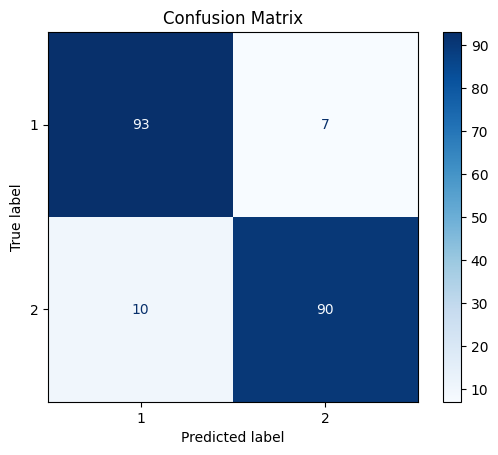

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# 1. Creating the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 2. Displaying the confusion matrix using matplotlib
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()